In [76]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('../data_cleaning/cleaned_dataset.csv')
df

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714
...,...,...,...,...,...,...,...,...,...,...,...
1071,refugees,Al Jazeera English,Denijal Jegic,Trump’s Kosovo-Serbia normalisation deal is al...,https://www.aljazeera.com/opinions/2020/9/28/t...,"On September 4, after years of unsuccessful ne...",2020-09-28T07:56:37Z,0.0000,0.000,0.000,1.000
1072,refugees,Al Jazeera English,Farah Najjar,What is behind Bahrain's normalisation deal wi...,https://www.aljazeera.com/news/2020/09/cloneof...,Twenty-six years after Bahrain welcomed an Isr...,2020-09-13T19:52:06Z,0.0000,0.000,0.000,1.000
1073,refugees,Al Jazeera English,Al Jazeera,Explainer: Where do Arab states stand on norma...,https://www.aljazeera.com/news/2020/09/explain...,The United Arab Emirates (UAE) and Bahrain are...,2020-09-22T14:22:14Z,0.0000,0.000,0.000,1.000
1074,refugees,Al Jazeera English,Greta Moran,Is the climate crisis creating a mental health...,https://www.aljazeera.com/indepth/features/cli...,Psychiatrist Dr Lise Van Susteren did not expe...,2020-09-14T05:49:51Z,-0.7906,0.532,0.143,0.325


In [53]:
df_1 = df.copy()
migrants = 0
immigrants = 0
refugees = 0 
immigration = 0 
trump = 0 

for index, row in df_1.iterrows():
    df_1.loc[index, 'Title'] = row['Title'].lower()
    if ' migrants' in row['Title']:
        migrants += 1
    if 'immigrants' in row['Title']:
        immigrants += 1
    if 'refugees' in row['Title']:
        refugees += 1
    if 'immigration' in row['Title']:
        immigration += 1
    if 'trump' in row['Title']:
        trump += 1
        
print(f'Migrants occurs {migrants} times.'
     f'\nImmigrants occurs {immigrants} times.'
     f'\nRefugees occurs {refugees} times.'
     f'\nImmigration occurs {immigration} times.'
     f'\nTrump occurs {trump} times.')

Migrants occurs 9 times.
Immigrants occurs 18 times.
Refugees occurs 13 times.
Immigration occurs 11 times.
Trump occurs 0 times.


In [54]:
#https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk

In [55]:
# There's a lot of noise in the authors
df['Author'].value_counts()

Al Jazeera                          96
Chris Tomlinson                     47
Neil Munro                          34
John Binder                         32
CBS News                            25
                                    ..
Burgess Everett                      1
Frances Martel, \nFrances Martel     1
Julie Compton                        1
Kathryn Watson                       1
Nicole Brown                         1
Name: Author, Length: 464, dtype: int64

In [56]:
df.loc[df['Author']=='Chris Tomlinson']

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
442,immigrants,Breitbart News,Chris Tomlinson,Over 100 Migrants Jump Overboard from NGO Vess...,https://www.breitbart.com/europe/2020/09/20/ov...,Nearly half the migrants aboard a Spanish migr...,2020-09-20T17:46:43Z,0.0258,0.000,0.099,0.901
444,immigrants,Breitbart News,Chris Tomlinson,Swedish Police: New Gang Culture Emerged from ...,https://www.breitbart.com/europe/2020/10/04/sw...,The head of the intelligence unit of the Natio...,2020-10-04T08:11:51Z,0.0000,0.000,0.000,1.000
445,immigrants,Breitbart News,Chris Tomlinson,Migrant Under Deportation Order Turns Himself ...,https://www.breitbart.com/europe/2020/09/17/mi...,A homeless illegal migrant from Tunisia has tu...,2020-09-17T08:47:29Z,-0.6908,0.320,0.000,0.680
793,migrant,Breitbart News,Chris Tomlinson,Iraqi Migrants Accused of Dragging Women into ...,https://www.breitbart.com/europe/2020/09/27/ir...,Two Iraqi migrant brothers are on trial in a B...,2020-09-27T07:37:46Z,-0.7906,0.438,0.000,0.562
797,migrant,Breitbart News,Chris Tomlinson,Pakistani Migrant Paris Attacker Revealed to B...,https://www.breitbart.com/europe/2020/09/29/pa...,Paris investigators have revealed that the Pak...,2020-09-29T09:05:19Z,-0.5719,0.291,0.000,0.709
798,migrant,Breitbart News,Chris Tomlinson,French Police Catch Pregnant 13-Year-Old Migra...,https://www.breitbart.com/europe/2020/09/13/fr...,French police in the city of Montpellier arres...,2020-09-13T13:47:40Z,0.0000,0.000,0.000,1.000
799,migrant,Breitbart News,Chris Tomlinson,Populist Salvini Physically Attacked by Leftis...,https://www.breitbart.com/europe/2020/09/11/sa...,Populist Italian Senator Matteo Salvini was th...,2020-09-11T12:00:40Z,-0.4588,0.273,0.000,0.727
800,migrant,Breitbart News,Chris Tomlinson,Underage Afghan Migrants Arrested for Moria Mi...,https://www.breitbart.com/europe/2020/09/16/un...,"Greek police have arrested five migrants, incl...",2020-09-16T10:36:45Z,-0.4767,0.279,0.000,0.721
801,migrant,Breitbart News,Chris Tomlinson,Confession: Pakistani Migrant Stabbed German T...,https://www.breitbart.com/europe/2020/09/16/pa...,A 19-year-old German was stabbed at random on ...,2020-09-16T09:19:36Z,-0.6249,0.338,0.000,0.662
804,migrant,Breitbart News,Chris Tomlinson,Majority of Germans Fear Taking Migrants from ...,https://www.breitbart.com/europe/2020/09/20/ma...,A majority of Germans have expressed concern t...,2020-09-20T16:39:17Z,-0.4939,0.211,0.000,0.789


In [57]:
df.loc[df['Author']=='Neil Munro']

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
156,immigrant,Breitbart News,Neil Munro,"Amnesty Groups Demand Bailout for Cities, Stat...",https://www.breitbart.com/politics/2020/09/16/...,The unemployment rate for illegal migrants in ...,2020-09-17T00:40:20Z,-0.6705,0.419,0.000,0.581
158,immigrant,Breitbart News,Neil Munro,Cato: Immigration Slowed During 2019 Economic ...,https://www.breitbart.com/economy/2020/09/20/c...,President Donald Trump’s personality and polic...,2020-09-21T04:11:36Z,0.0000,0.000,0.000,1.000
159,immigrant,Breitbart News,Neil Munro,Politico: ‘Union Members Snub Biden for Trump’,https://www.breitbart.com/economy/2020/09/22/p...,Union leaders are trying to drag their members...,2020-09-22T19:18:07Z,-0.4215,0.318,0.000,0.682
160,immigrant,Breitbart News,Neil Munro,Immigration Reformers OK Judge Amy Coney Barrett,https://www.breitbart.com/economy/2020/09/27/i...,Judge Amy Coney Barrett is getting applause fr...,2020-09-28T04:10:05Z,0.4466,0.000,0.328,0.672
163,immigrant,Breitbart News,Neil Munro,Axios: New York City Shrinks Due to Lower Immi...,https://www.breitbart.com/politics/2020/09/18/...,President Donald Trump’s pro-American curbs on...,2020-09-18T23:05:13Z,-0.2960,0.216,0.000,0.784
170,immigrant,Breitbart News,Neil Munro,DHS Denies Democrat Claims It Downplays the Th...,https://www.breitbart.com/immigration/2020/09/...,Department of Homeland Security (DHS) acting S...,2020-09-09T22:51:27Z,-0.8834,0.563,0.000,0.437
179,immigrant,Breitbart News,Neil Munro,Joe Biden Promises to Let Mayors Import Foreig...,https://www.breitbart.com/economy/2020/09/10/j...,"If Joe Biden is elected president, mayors and ...",2020-09-10T21:43:43Z,0.3818,0.000,0.245,0.755
180,immigrant,Breitbart News,Neil Munro,Glenn Beck: We Need One Billion People in the ...,https://www.breitbart.com/politics/2020/09/24/...,The United States needs one billion people to ...,2020-09-24T14:34:36Z,0.0000,0.000,0.000,1.000
185,immigrant,Breitbart News,Neil Munro,Watch: Chad Wolf’s DHS Confirmation Hearing,https://www.breitbart.com/immigration/2020/09/...,"Chad Wolf, the acting secretary at the Departm...",2020-09-23T13:33:29Z,0.0000,0.000,0.000,1.000
186,immigrant,Breitbart News,Neil Munro,Democrats Demand Investigation of ‘Mass Hyster...,https://www.breitbart.com/2020-election/2020/0...,Democrats are pushing for an investigation int...,2020-09-16T18:56:36Z,-0.1280,0.158,0.000,0.842


In [58]:
# we may want to get rid of The Wall Street Journal, Buzzfeed and MSNBC for this analysis

df['Source'].value_counts()

Breitbart News             261
The Washington Post        174
Fox News                   169
Al Jazeera English         162
NBC News                   124
Politico                   109
CBS News                    68
The Wall Street Journal      7
Buzzfeed                     1
MSNBC                        1
Name: Source, dtype: int64

In [59]:
source_group = df.groupby('Source')
source_group.mean()

,compound score,negative score,positive score,neutral score
Source,,,,
Al Jazeera English,-0.211046,0.183840,0.052895,0.763284
Breitbart News,-0.177283,0.162885,0.066326,0.770789
Buzzfeed,0.000000,0.000000,0.000000,1.000000
CBS News,-0.053441,0.101926,0.065235,0.832853
Fox News,-0.094572,0.131864,0.081645,0.786473
MSNBC,0.421500,0.221000,0.451000,0.328000
NBC News,-0.083010,0.119798,0.072605,0.807621
Politico,-0.047876,0.092202,0.077358,0.830450
The Wall Street Journal,-0.113743,0.143286,0.100000,0.756714


In [60]:
df.loc[df['compound score'] == df['compound score'].max()]

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
562,immigration,The Wall Street Journal,WSJ Staff,WSJ Wealth Adviser Briefing: Value Stocks Outp...,https://blogs.wsj.com/moneybeat/2020/10/01/wsj...,Raymond James is combining its unit that provi...,2020-10-01T10:00:00Z,0.8885,0.0,0.561,0.439


In [61]:
df.loc[df['compound score'] == df['compound score'].min()]

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score
95,immigrant,Fox News,Dom Calicchio,Mackenzie Lueck’s killer pleads guilty to aggr...,https://www.foxnews.com/us/mackenzie-luecks-ki...,A Nigerian immigrant whom authorities say stra...,2020-10-08T08:38:24Z,-0.9744,0.799,0.0,0.201


In [62]:
# 0 = neutral, 1 = positive, -1 = negative
df['Overall Sentiment'] = 0
df.loc[df['compound score'] > 0.2, 'Overall Sentiment'] = 1 
df.loc[df['compound score'] < -0.2, 'Overall Sentiment'] = -1 
df

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score,Overall Sentiment
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000,0
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818,-1
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676,0
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805,-1
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,refugees,Al Jazeera English,Denijal Jegic,Trump’s Kosovo-Serbia normalisation deal is al...,https://www.aljazeera.com/opinions/2020/9/28/t...,"On September 4, after years of unsuccessful ne...",2020-09-28T07:56:37Z,0.0000,0.000,0.000,1.000,0
1072,refugees,Al Jazeera English,Farah Najjar,What is behind Bahrain's normalisation deal wi...,https://www.aljazeera.com/news/2020/09/cloneof...,Twenty-six years after Bahrain welcomed an Isr...,2020-09-13T19:52:06Z,0.0000,0.000,0.000,1.000,0
1073,refugees,Al Jazeera English,Al Jazeera,Explainer: Where do Arab states stand on norma...,https://www.aljazeera.com/news/2020/09/explain...,The United Arab Emirates (UAE) and Bahrain are...,2020-09-22T14:22:14Z,0.0000,0.000,0.000,1.000,0
1074,refugees,Al Jazeera English,Greta Moran,Is the climate crisis creating a mental health...,https://www.aljazeera.com/indepth/features/cli...,Psychiatrist Dr Lise Van Susteren did not expe...,2020-09-14T05:49:51Z,-0.7906,0.532,0.143,0.325,-1


In [63]:
df['Overall Sentiment'].value_counts()

 0    453
-1    417
 1    206
Name: Overall Sentiment, dtype: int64

In [64]:
df.groupby(['Source','Overall Sentiment']).count()

Keyword  Author  Title  URL  Text  \
Source                  Overall Sentiment                                      
Al Jazeera English      -1                      78      78     78   78    78   
                         0                      68      68     68   68    68   
                         1                      16      16     16   16    16   
Breitbart News          -1                     111     111    111  111   111   
                         0                     106     106    106  106   106   
                         1                      44      44     44   44    44   
Buzzfeed                 0                       1       1      1    1     1   
CBS News                -1                      19      19     19   19    19   
                         0                      39      39     39   39    39   
                         1                      10      10     10   10    10   
Fox News                -1                      68      68     68   68    68   
                         0                      60      60     60   60    60   
                         1                      41      41     41   41    41   
MSNBC                    1                       1       1      1    1     1   
NBC News                -1                      44      44     44   44    44   
                         0                      54      53     54   54    54   
                         1                      26      25     26   26    26   
Politico                -1                      35      35     35   35    35   
                         0                      49      48     49   49    49   
                         1                      25      25     25   25    25   
The Wall Street Journal -1                       3       3      3    3     3   
                         0                       2       2      2    2     2   
                         1                       2       2      2    2     2   
The Washington Post     -1                      59      59     59   59    59   
                         0                      74      74     74   74    74   
                         1                      41      41     41   41    41   

                                           Published  compound score  \
Source                  Overall Sentiment                              
Al Jazeera English      -1                        78              78   
                         0                        68              68   
                         1                        16              16   
Breitbart News          -1                       111             111   
                         0                       106             106   
                         1                        44              44   
Buzzfeed                 0                         1               1   
CBS News                -1                        19              19   
                         0                        39              39   
                         1                        10              10   
Fox News                -1                        68              68   
                         0                        60              60   
                         1                        41              41   
MSNBC                    1                         1               1   
NBC News                -1                        44              44   
                         0                        54              54   
                         1                        26              26   
Politico                -1                        35              35   
                         0                        49              49   
                         1                        25              25   
The Wall Street Journal -1                         3               3   
                         0                         2               2   
                         1                         2               2   
Th

In [65]:
def process_corpus(titles):
    tokens = []
    for title in titles:
        tokenizer = RegexpTokenizer(r'\w+')
        toks = tokenizer.tokenize(title)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    return tokens

In [66]:
headlines = list(df['Title'])
headlines_tokens = process_corpus(headlines)
headlines_freq = nltk.FreqDist(headlines_tokens)
headlines_freq.most_common(20)

[('trump', 240),
 ('biden', 104),
 ('migrants', 60),
 ('court', 54),
 ('migrant', 52),
 ('new', 51),
 ('says', 50),
 ('coronavirus', 50),
 ('u', 46),
 ('covid', 43),
 ('us', 40),
 ('debate', 37),
 ('border', 34),
 ('harris', 32),
 ('american', 29),
 ('illegal', 29),
 ('ice', 28),
 ('voters', 28),
 ('police', 27),
 ('19', 26)]

In [67]:
pos_headlines = list(df.loc[df['Overall Sentiment']==1]['Title'])
pos_headlines_tokens = process_corpus(pos_headlines)
pos_headlines_freq = nltk.FreqDist(pos_headlines_tokens)
pos_headlines_freq.most_common(20)

[('trump', 57),
 ('biden', 25),
 ('court', 22),
 ('supreme', 19),
 ('justice', 14),
 ('says', 13),
 ('new', 12),
 ('coronavirus', 12),
 ('democrats', 11),
 ('voters', 10),
 ('harris', 10),
 ('help', 9),
 ('immigration', 9),
 ('u', 9),
 ('care', 8),
 ('joe', 8),
 ('covid', 8),
 ('ruth', 7),
 ('bader', 7),
 ('ginsburg', 7)]

In [68]:
neg_headlines = list(df.loc[df['Overall Sentiment']==-1]['Title'])
neg_headlines_tokens = process_corpus(neg_headlines)
neg_headlines_freq = nltk.FreqDist(neg_headlines_tokens)
neg_headlines_freq.most_common(20)

[('trump', 86),
 ('biden', 34),
 ('migrants', 31),
 ('illegal', 29),
 ('migrant', 27),
 ('new', 24),
 ('death', 19),
 ('court', 18),
 ('says', 18),
 ('us', 18),
 ('ice', 17),
 ('covid', 17),
 ('border', 17),
 ('camp', 17),
 ('u', 15),
 ('crisis', 15),
 ('police', 15),
 ('pandemic', 14),
 ('arrested', 14),
 ('fight', 13)]

In [69]:
pol_bias_score = {'ABC News': -1.7, 'Al Jazeera English': -4.4, 'Bloomberg': -1.8, 'Breitbart News': 2.9, 'Buzzfeed': -3.5, 'CBS News': -1.6, 'CNN': -2.2, 'Fox News': 2, 'Google News': -1.3, 'MSNBC': -2.4, 'NBC News': -2.1, 'Politico': -3.5, 'The Huffington Post': -3.6, 'The Wall Street Journal': -0.25, 'The Washington Post': -3.7, 'USA TODAY': -1.3}

sources = df['Source'].unique()
for source in sources:
    if source in pol_bias_score.keys():
        print("True")
    else:
        print(f'{source} is not scored')

True
True
True
True
True
True
True
True
True
True


In [71]:
df['Source Bias'] = 0
for source in pol_bias_score:
    df.loc[df['Source'] == source, 'Source Bias'] = pol_bias_score[source]
    
df.head()
    

,Keyword,Source,Author,Title,URL,Text,Published,compound score,negative score,positive score,neutral score,Overall Sentiment,Source Bias
0,immigrant,The Washington Post,Nick Miroff,Hospital where activists say ICE detainees wer...,https://www.washingtonpost.com/immigration/ice...,According to a complaint filed last week by im...,2020-09-22T20:10:00Z,0.0000,0.000,0.000,1.000,0,-3.7
1,immigrant,The Washington Post,"Nick Miroff, Devlin Barrett",ICE preparing targeted arrests in ‘sanctuary c...,https://www.washingtonpost.com/immigration/tru...,"Chad Wolf, acting secretary of the Department ...",2020-09-29T22:37:00Z,-0.4404,0.182,0.000,0.818,-1,-3.7
2,immigrant,The Washington Post,Tim Elfrink,‘They’re still not taking this seriously’: Whi...,https://www.washingtonpost.com/nation/2020/09/...,Ms. Wootens whistleblowing disclosures confirm...,2020-09-15T10:39:00Z,-0.1531,0.198,0.126,0.676,0,-3.7
3,immigrant,The Washington Post,"James A. McCann, Michael Jones-Correa",Trump’s attacks prompted Latino immigrants to ...,https://www.washingtonpost.com/politics/2020/1...,"How has all this affected Latino immigrants, t...",2020-10-01T11:00:12Z,-0.4404,0.195,0.000,0.805,-1,-3.7
4,immigrant,The Washington Post,Steven Moore,ICE is accused of sterilizing detainees. That ...,https://www.washingtonpost.com/politics/2020/0...,Forced sterilization in the U.S.\r\nSince the ...,2020-09-25T11:00:00Z,-0.6369,0.286,0.000,0.714,-1,-3.7


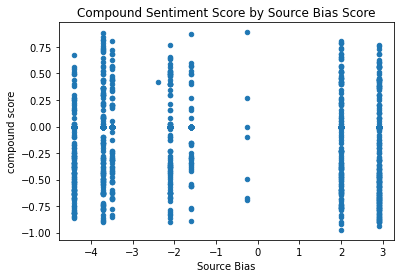

In [72]:
df.plot(kind='scatter', x='Source Bias', y='compound score', title='Compound Sentiment Score by Source Bias Score')

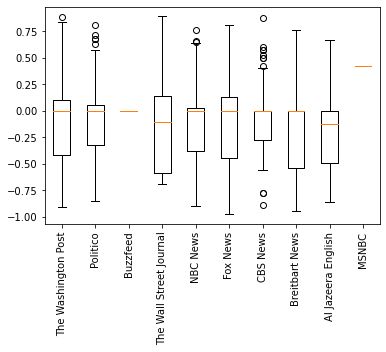

In [81]:
plt.boxplot([df['compound score'].loc[df['Source']==source] for source in sources])
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], sources, rotation='vertical')
plt.show()